In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
glass=pd.read_csv("/content/glass1.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis (EDA):**

In [3]:
glass.isna().sum()

,0
RI,785
Na,785
Mg,785
Al,785
Si,785
K,785
Ca,785
Ba,785
Fe,785
Type,785


In [4]:
glass.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,float64


In [5]:
glass['RI'].unique()

array([1.52101, 1.51761, 1.51618, 1.51766, 1.51742, 1.51596, 1.51743,
       1.51756, 1.51918, 1.51755, 1.51571, 1.51763, 1.51589, 1.51748,
       1.51784, 1.52196, 1.51911, 1.51735, 1.5175 , 1.51966, 1.51736,
       1.51751, 1.5172 , 1.51764, 1.51793, 1.51721, 1.51768, 1.51747,
       1.51775, 1.51753, 1.51783, 1.51567, 1.51909, 1.51797, 1.52213,
       1.51779, 1.5221 , 1.51786, 1.519  , 1.51869, 1.52667, 1.52223,
       1.51898, 1.5232 , 1.51926, 1.51808, 1.51837, 1.51778, 1.51769,
       1.51215, 1.51824, 1.51754, 1.51905, 1.51977, 1.52172, 1.52227,
       1.52099, 1.52152, 1.523  , 1.51574, 1.51848, 1.51593, 1.51631,
       1.5159 , 1.51645, 1.51627, 1.51613, 1.51592, 1.51646, 1.51594,
       1.51409, 1.51625, 1.51569, 1.5164 , 1.51841, 1.51605, 1.51588,
       1.51629, 1.5186 , 1.51689, 1.51811, 1.51655, 1.5173 , 1.5182 ,
       1.52725, 1.5241 , 1.52475, 1.53125, 1.53393, 1.52222, 1.51818,
       1.52664, 1.52739, 1.52777, 1.51892, 1.51847, 1.51846, 1.51829,
       1.51708, 1.51

<Axes: >

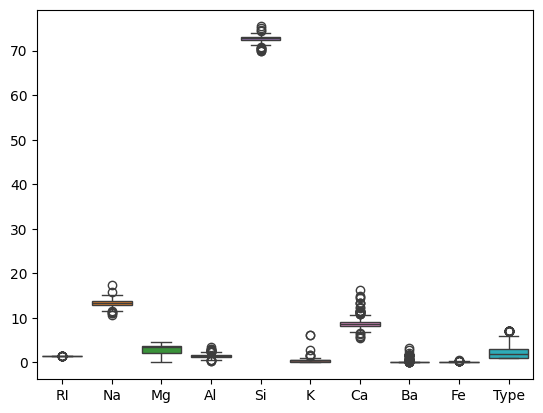

In [6]:
sns.boxplot(glass)

In [7]:
glass.fillna(glass.drop(columns=["Mg"]).median(),inplace=True)

In [8]:
glass["Mg"].fillna(glass["Mg"].mean(),inplace=True)

In [9]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.490000,1.10,71.78,0.060,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.600000,1.36,72.73,0.480,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.550000,1.54,72.99,0.390,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.690000,1.29,72.61,0.570,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.620000,1.24,73.08,0.550,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,1.51768,13.30,2.684533,1.36,72.79,0.555,8.60,0.0,0.0,2.0
995,1.51768,13.30,2.684533,1.36,72.79,0.555,8.60,0.0,0.0,2.0
996,1.51768,13.30,2.684533,1.36,72.79,0.555,8.60,0.0,0.0,2.0
997,1.51768,13.30,2.684533,1.36,72.79,0.555,8.60,0.0,0.0,2.0


In [10]:
glass.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [11]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.517827,13.323103,2.684533,1.378188,72.76021,0.542588,8.676466,0.037497,0.012212,2.167167
std,0.001431,0.379844,0.666366,0.233272,0.36235,0.302238,0.673600,0.240682,0.050734,1.023317
min,1.511150,10.730000,0.000000,0.290000,69.81000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.517680,13.300000,2.684533,1.360000,72.79000,0.555000,8.600000,0.000000,0.000000,2.000000
50%,1.517680,13.300000,2.684533,1.360000,72.79000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.517680,13.300000,2.684533,1.360000,72.79000,0.555000,8.600000,0.000000,0.000000,2.000000
max,1.533930,17.380000,4.490000,3.500000,75.41000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      999 non-null    float64
 1   Na      999 non-null    float64
 2   Mg      999 non-null    float64
 3   Al      999 non-null    float64
 4   Si      999 non-null    float64
 5   K       999 non-null    float64
 6   Ca      999 non-null    float64
 7   Ba      999 non-null    float64
 8   Fe      999 non-null    float64
 9   Type    999 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [13]:
glass["Type"].value_counts()

,count
Type,
2.0,861
1.0,70
7.0,29
3.0,17
5.0,13
6.0,9


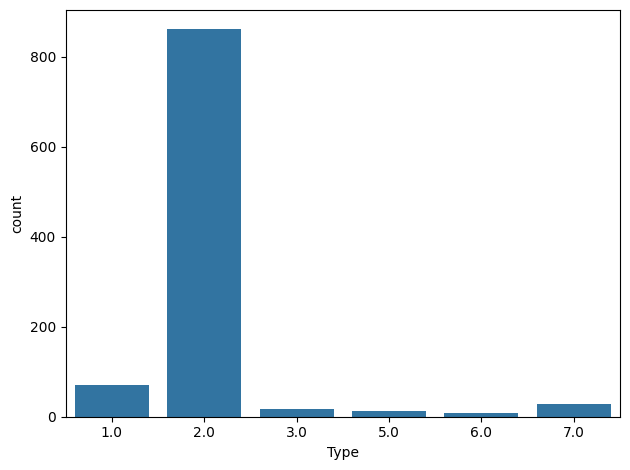

In [14]:
sns.countplot(data=glass,x="Type")
plt.tight_layout()
plt.show()

## **Data Visualization**

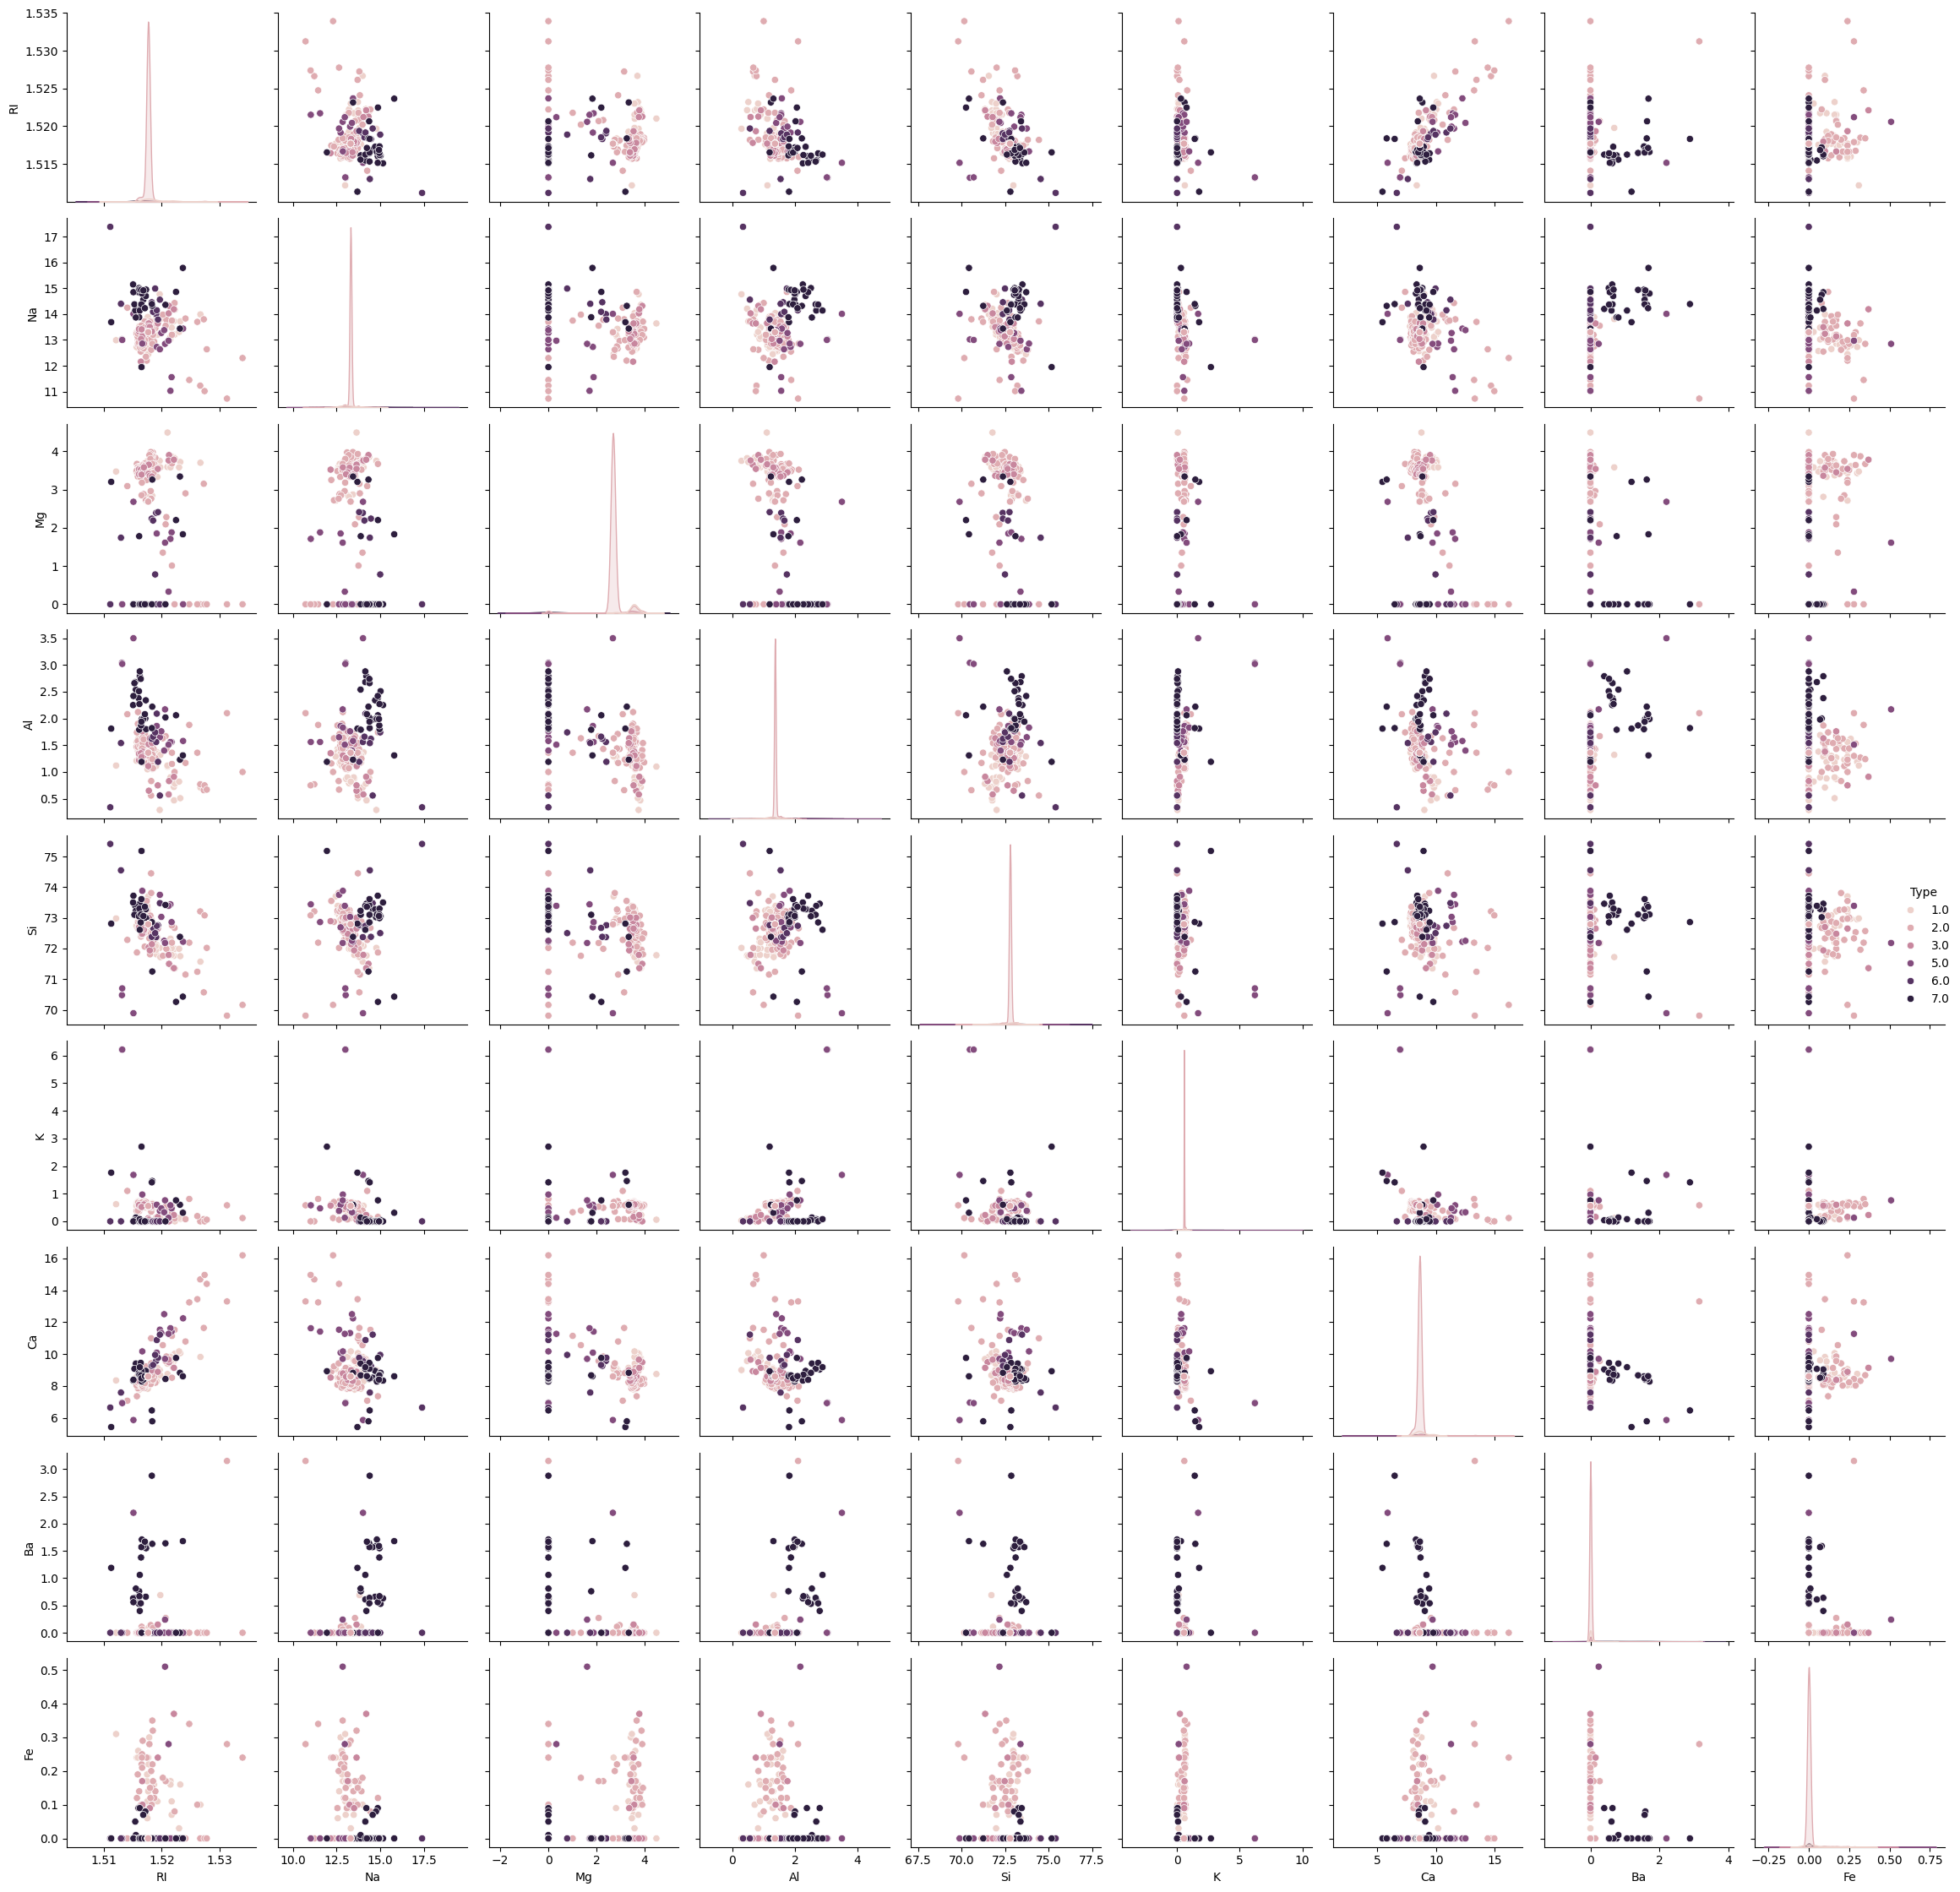

In [15]:
sns.pairplot(glass,hue='Type')
plt.tight_layout()
plt.show()

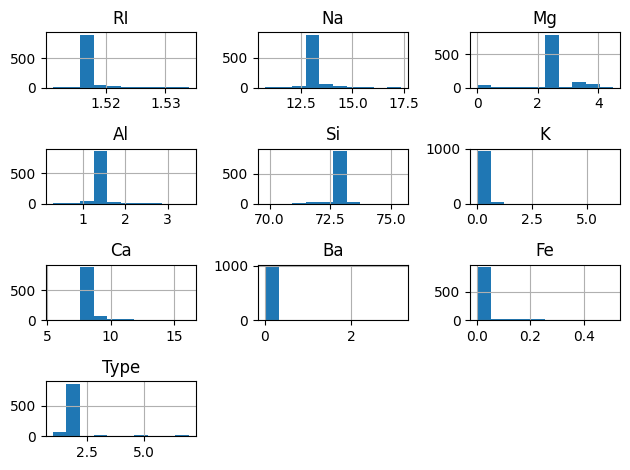

In [16]:
glass.hist()
plt.tight_layout()
plt.show()

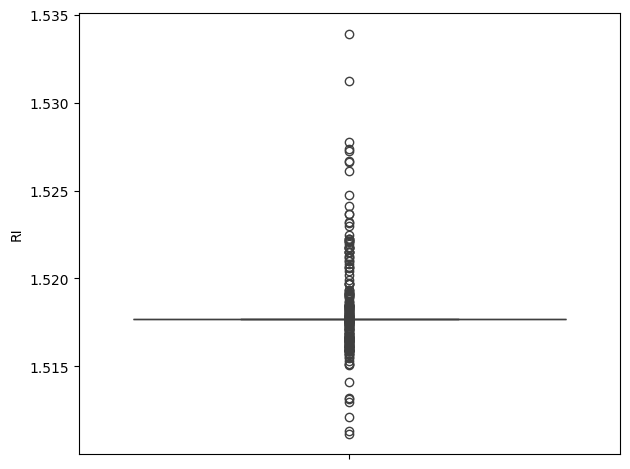

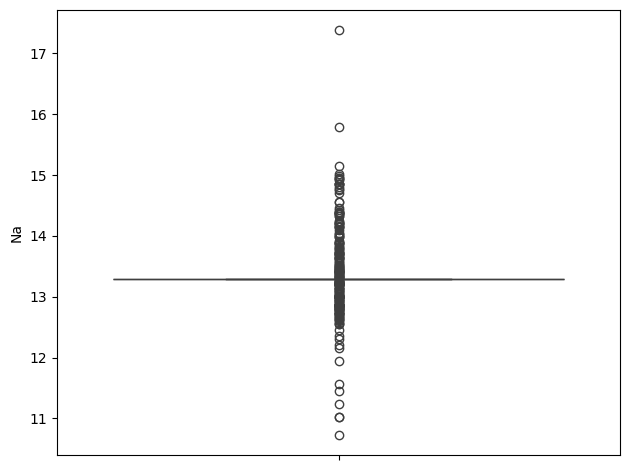

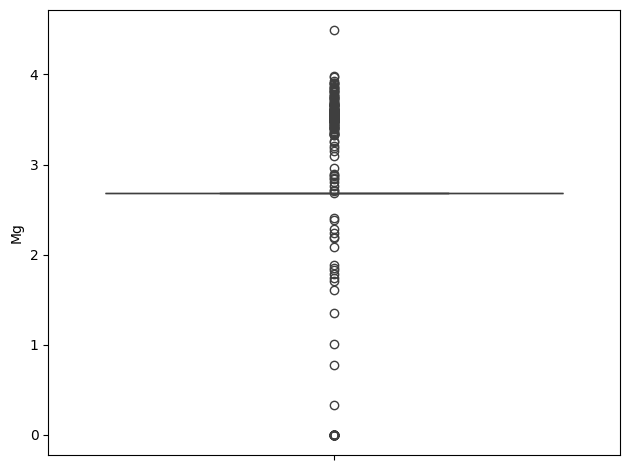

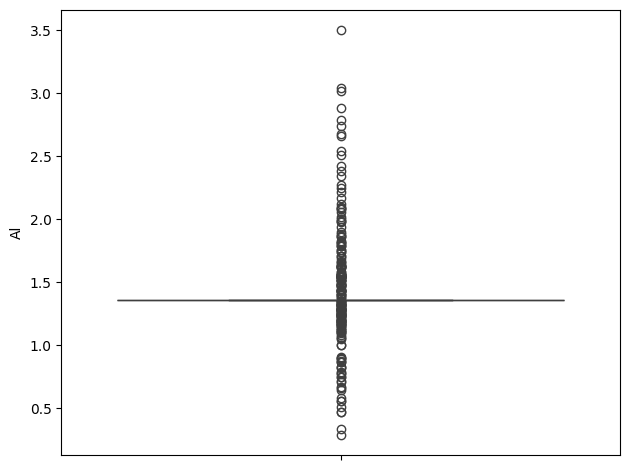

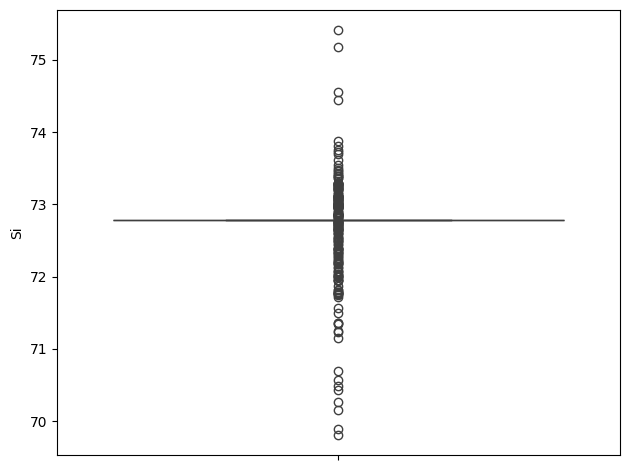

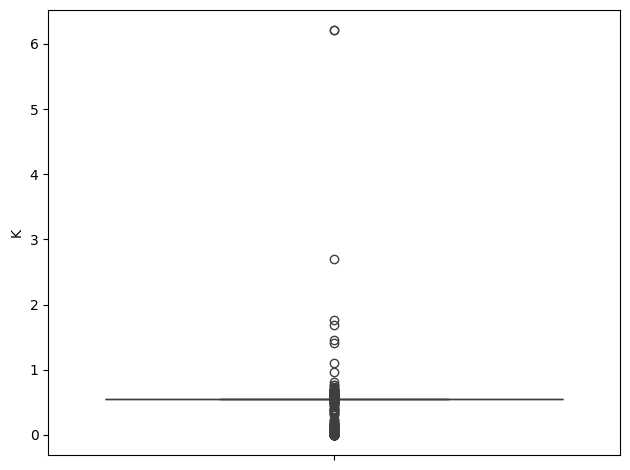

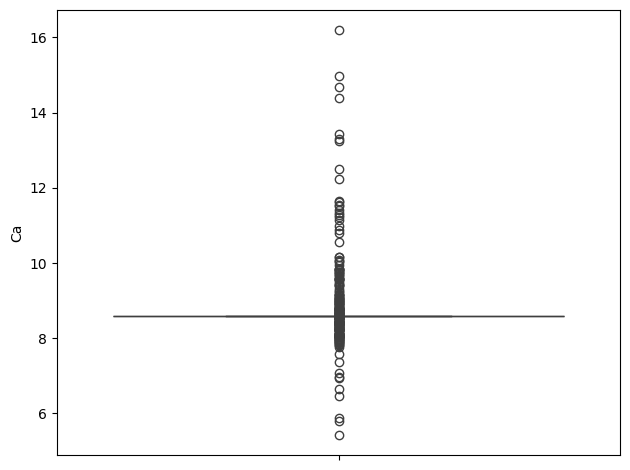

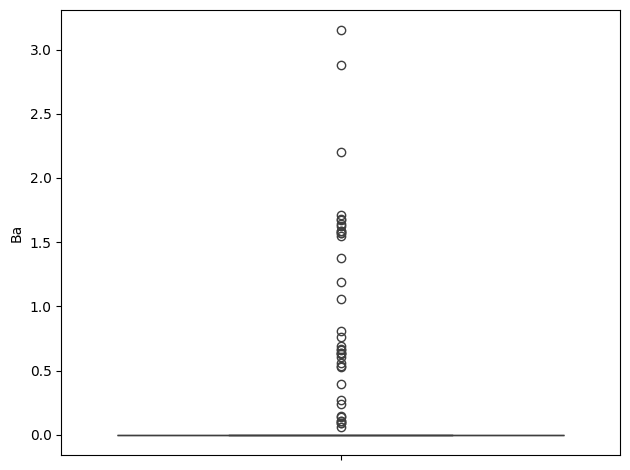

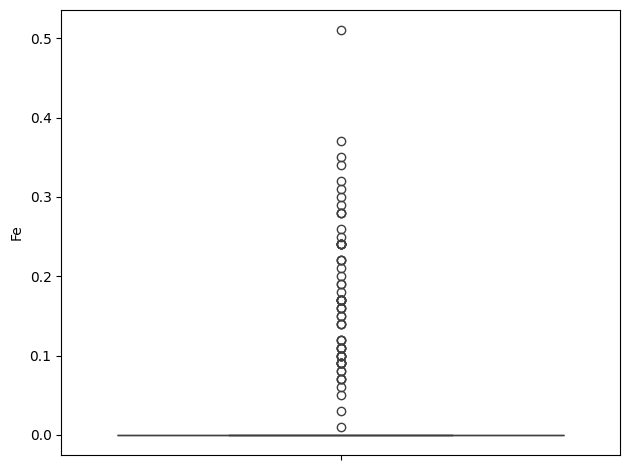

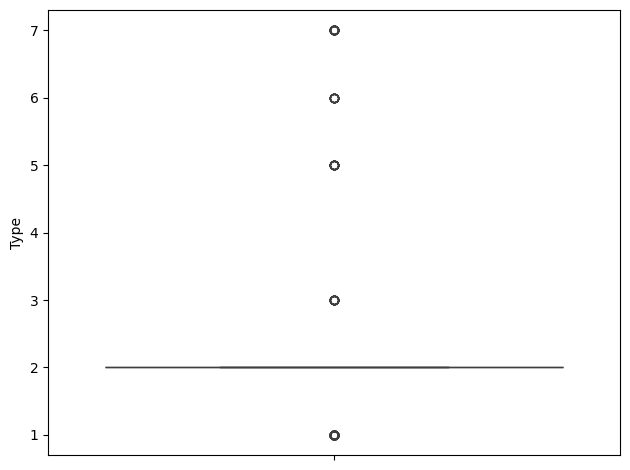

In [17]:
for i in glass.columns:
  sns.boxplot(glass[i])
  plt.tight_layout()
  plt.show()

In [18]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.163941,-0.119887,-0.365514,-0.555810,-0.298767,0.818327,0.058339,0.215105,-0.091389
Na,-0.163941,1.000000,-0.271866,0.171391,-0.086828,-0.272625,-0.241662,0.344379,-0.158921,0.510852
Mg,-0.119887,-0.271866,1.000000,-0.476391,-0.163855,0.005379,-0.433124,-0.469813,0.073696,-0.707552
Al,-0.365514,0.171391,-0.476391,1.000000,-0.028931,0.309542,-0.218032,0.497010,0.003641,0.609119
Si,-0.555810,-0.086828,-0.163855,-0.028931,1.000000,-0.177927,-0.235459,-0.143307,-0.155202,0.092837
K,-0.298767,-0.272625,0.005379,0.309542,-0.177927,1.000000,-0.326382,-0.064042,-0.043126,-0.034154
Ca,0.818327,-0.241662,-0.433124,-0.218032,-0.235459,-0.326382,1.000000,-0.040175,0.208560,0.068975
Ba,0.058339,0.344379,-0.469813,0.497010,-0.143307,-0.064042,-0.040175,1.000000,0.088002,0.614797
Fe,0.215105,-0.158921,0.073696,0.003641,-0.155202,-0.043126,0.208560,0.088002,1.000000,-0.014271
Type,-0.091389,0.510852,-0.707552,0.609119,0.092837,-0.034154,0.068975,0.614797,-0.014271,1.000000


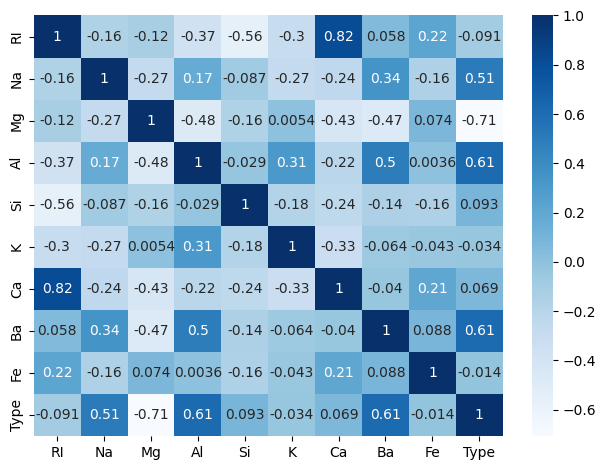

In [19]:
sns.heatmap(glass.corr(),annot=True,cmap="Blues")
plt.tight_layout()
plt.show()

In [26]:
x=glass.drop(columns=["Type"])
y=glass["Type"]

In [27]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.490000,1.10,71.78,0.060,8.75,0.0,0.0
1,1.51761,13.89,3.600000,1.36,72.73,0.480,7.83,0.0,0.0
2,1.51618,13.53,3.550000,1.54,72.99,0.390,7.78,0.0,0.0
3,1.51766,13.21,3.690000,1.29,72.61,0.570,8.22,0.0,0.0
4,1.51742,13.27,3.620000,1.24,73.08,0.550,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
994,1.51768,13.30,2.684533,1.36,72.79,0.555,8.60,0.0,0.0
995,1.51768,13.30,2.684533,1.36,72.79,0.555,8.60,0.0,0.0
996,1.51768,13.30,2.684533,1.36,72.79,0.555,8.60,0.0,0.0
997,1.51768,13.30,2.684533,1.36,72.79,0.555,8.60,0.0,0.0


In [28]:
y

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
994,2.0
995,2.0
996,2.0
997,2.0


In [29]:
scaler=StandardScaler()
x1=scaler.fit_transform(x)

In [31]:
x=pd.DataFrame(x1,columns=x.columns)

In [32]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,2.225697,0.834699,2.710781e+00,-1.193148,-2.706499,-1.597514,0.109220,-0.155875,-0.24083
1,-0.151607,1.493193,1.374509e+00,-0.078009,-0.083415,-0.207184,-1.257259,-0.155875,-0.24083
2,-1.151473,0.544961,1.299438e+00,0.694010,0.634482,-0.505112,-1.331525,-0.155875,-0.24083
3,-0.116646,-0.297911,1.509638e+00,-0.378239,-0.414752,0.090744,-0.677991,-0.155875,-0.24083
4,-0.284456,-0.139872,1.404538e+00,-0.592688,0.882985,0.024537,-0.900787,-0.155875,-0.24083
...,...,...,...,...,...,...,...,...,...
994,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
995,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
996,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
997,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083


In [33]:
x.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02
mean,2.119679e-13,-6.664450e-15,6.150450e-16,1.593209e-15,3.139475e-14,3.840772e-16,1.749685e-15,-2.845016e-17,1.138006e-16
std,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00
min,-4.668485e+00,-6.830171e+00,-4.030636e+00,-4.667234e+00,-8.145948e+00,-1.796133e+00,-4.821987e+00,-1.558749e-01,-2.408302e-01
25%,-1.026624e-01,-6.085301e-02,6.667685e-16,-7.800905e-02,8.225382e-02,4.108893e-02,-1.135759e-01,-1.558749e-01,-2.408302e-01
50%,-1.026624e-01,-6.085301e-02,6.667685e-16,-7.800905e-02,8.225382e-02,4.108893e-02,-1.135759e-01,-1.558749e-01,-2.408302e-01
75%,-1.026624e-01,-6.085301e-02,6.667685e-16,-7.800905e-02,8.225382e-02,4.108893e-02,-1.135759e-01,-1.558749e-01,-2.408302e-01
max,1.125945e+01,1.068577e+01,2.710781e+00,9.100441e+00,7.316445e+00,1.876089e+01,1.115988e+01,1.293849e+01,9.816596e+00


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
382,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.240830
904,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.240830
981,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.240830
47,6.183209,1.756590,1.524652e+00,-2.865856,-3.286339,-1.729927,1.698494,-0.155875,1.731214
521,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.240830
...,...,...,...,...,...,...,...,...,...
767,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.240830
72,-1.326275,-0.613988,1.359495e+00,0.608230,0.938208,0.421775,-1.257259,-0.155875,-0.240830
908,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.240830
235,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.240830


In [36]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
507,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
608,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
452,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
368,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
242,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
...,...,...,...,...,...,...,...,...,...
430,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
587,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
550,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083
607,-0.102662,-0.060853,6.667685e-16,-0.078009,0.082254,0.041089,-0.113576,-0.155875,-0.24083


In [37]:
y_train

,Type
382,2.0
904,2.0
981,2.0
47,1.0
521,2.0
...,...
767,2.0
72,2.0
908,2.0
235,2.0


In [38]:
y_test

,Type
507,2.0
608,2.0
452,2.0
368,2.0
242,2.0
...,...
430,2.0
587,2.0
550,2.0
607,2.0


In [42]:
rf=RandomForestClassifier(random_state=2)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [43]:
predict=rf.predict(x_test)

In [44]:
predict

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 1., 7., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1.,
       2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 5., 2., 2., 2.,
       2., 6., 2., 2., 7., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 3., 7., 2., 2., 2., 2., 2., 2., 2., 7.,
       7., 2., 2., 2., 2., 2., 7., 2., 2., 2., 2., 1., 2., 2., 2., 2., 7.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 7.])

In [47]:
print('train accuracy:',rf.score(x_train,y_train))
print('test accuracy:',rf.score(x_test,y_test))

train accuracy: 1.0
test accuracy: 0.955


In [50]:
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
f1 = f1_score(y_test, predict, average='weighted')
classification_rep = classification_report(y_test, predict)

In [51]:
print(accuracy)
print(precision)
print(recall)
print(f1)
print(classification_rep)

0.955
0.9544935064935065
0.955
0.9531980676328502
              precision    recall  f1-score   support

         1.0       0.91      0.71      0.80        14
         2.0       0.97      0.99      0.98       170
         3.0       0.50      0.50      0.50         4
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         1
         7.0       1.00      0.80      0.89        10

    accuracy                           0.95       200
   macro avg       0.90      0.83      0.86       200
weighted avg       0.95      0.95      0.95       200



In [57]:
params={
    'n_estimators':[90,100,150],
    'max_depth':[3,4,5,6,7,9],
    'min_samples_split':[2,4,6,8],
    'criterion':['gini','entropy']

    }

In [58]:
grid=GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 9],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [90, 100, 150]})

In [59]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 2,
 'n_estimators': 90}

In [60]:
rf=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_split=2,n_estimators=90,random_state=2)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=90,
                       random_state=2)

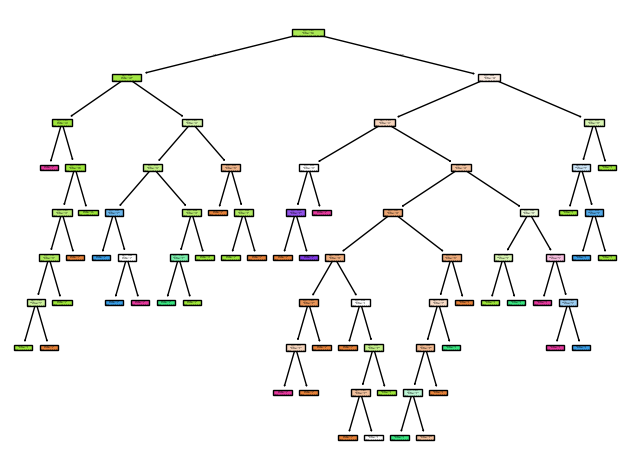

In [62]:
tree.plot_tree(rf.estimators_[0],filled=True)
plt.tight_layout()

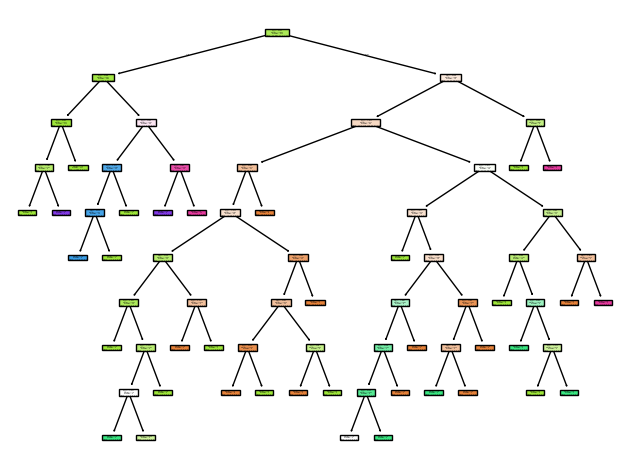

In [63]:
tree.plot_tree(rf.estimators_[5],filled=True)
plt.tight_layout()

## **Bagging and Boosting Methods**

In [64]:
from sklearn.ensemble import BaggingClassifier

In [66]:
model=BaggingClassifier(estimator=rf,n_estimators=90,random_state=2)
model.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                   max_depth=9, n_estimators=90,
                                                   random_state=2),
                  n_estimators=90, random_state=2)

In [68]:
pred=model.predict(x_test)
pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 6., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 1., 7., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1.,
       2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 5., 2., 2., 2.,
       2., 6., 2., 2., 7., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 3., 7., 2., 2., 2., 2., 2., 2., 2., 7.,
       7., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 7.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 7.])

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.82      0.64      0.72        14
         2.0       0.95      0.99      0.97       170
         3.0       0.67      0.50      0.57         4
         5.0       1.00      1.00      1.00         1
         6.0       0.50      1.00      0.67         1
         7.0       1.00      0.70      0.82        10

    accuracy                           0.94       200
   macro avg       0.82      0.81      0.79       200
weighted avg       0.94      0.94      0.94       200



In [71]:
from sklearn.ensemble import AdaBoostClassifier


In [72]:
model=AdaBoostClassifier(estimator=rf,n_estimators=90,random_state=2)
model.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=9,
                                                    n_estimators=90,
                                                    random_state=2),
                   n_estimators=90, random_state=2)

In [73]:
pred=model.predict(x_test)
pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 6., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 1., 7., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 5., 2., 2., 2.,
       2., 6., 2., 1., 7., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 1., 2., 2., 2., 2., 2., 3., 7., 2., 2., 2., 2., 2., 2., 2., 7.,
       7., 2., 2., 2., 2., 2., 7., 2., 2., 2., 2., 1., 2., 2., 2., 2., 7.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 7.])

In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       1.00      0.86      0.92        14
         2.0       0.97      0.99      0.98       170
         3.0       0.67      0.50      0.57         4
         5.0       1.00      1.00      1.00         1
         6.0       0.50      1.00      0.67         1
         7.0       1.00      0.80      0.89        10

    accuracy                           0.96       200
   macro avg       0.86      0.86      0.84       200
weighted avg       0.97      0.96      0.96       200

